# Vegetable Price Prediction Using Machine Learning
Implemented for West Bengal, Kolkata district, Bara Bazar market (Commodity = Onion) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [4]:
vegetables = pd.read_csv('Nagpur_Soyabean.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Nagpur,Bhiwapur,Soyabean,Yellow,FAQ,4000,4250,4125,29-Dec-19
1,2,Nagpur,Bhiwapur,Soyabean,Yellow,FAQ,3900,4280,4050,26-Dec-19
2,3,Nagpur,Bhiwapur,Soyabean,Yellow,FAQ,3750,4150,3900,15-Dec-19
3,4,Nagpur,Bhiwapur,Soyabean,Yellow,FAQ,3000,3785,3750,01-Dec-19
4,5,Nagpur,Bhiwapur,Soyabean,Yellow,FAQ,3000,3685,3350,24-Nov-19


# Data Selection

select District Name == Kolkata <br>
Select Market Name == Bara Bazar (Posta Bazar) <br>
Then Select Variety == Jyoti

In [5]:
vegetables = vegetables[vegetables['District Name'] == "Nagpur"]
vegetables = vegetables[vegetables['Market Name'] == "Katol"]
vegetables = vegetables[vegetables['Commodity'] == "Soyabean"]
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
84,85,Nagpur,Katol,Soyabean,Yellow,FAQ,3300,4331,4050,31-Dec-19
85,86,Nagpur,Katol,Soyabean,Yellow,FAQ,3550,4320,4120,30-Dec-19
86,87,Nagpur,Katol,Soyabean,Yellow,FAQ,3670,4365,4020,29-Dec-19
87,88,Nagpur,Katol,Soyabean,Yellow,FAQ,3275,4265,4060,27-Dec-19
88,89,Nagpur,Katol,Soyabean,Yellow,FAQ,3400,4279,3820,26-Dec-19


In [6]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
93,94,Nagpur,Katol,Soyabean,Yellow,FAQ,3700,4150,3920,19
92,93,Nagpur,Katol,Soyabean,Yellow,FAQ,3421,4176,3850,20
91,92,Nagpur,Katol,Soyabean,Yellow,FAQ,3251,4167,3820,22
90,91,Nagpur,Katol,Soyabean,Yellow,FAQ,3500,4260,4050,23
89,90,Nagpur,Katol,Soyabean,Yellow,FAQ,3500,4195,3820,24
88,89,Nagpur,Katol,Soyabean,Yellow,FAQ,3400,4279,3820,26
87,88,Nagpur,Katol,Soyabean,Yellow,FAQ,3275,4265,4060,27
86,87,Nagpur,Katol,Soyabean,Yellow,FAQ,3670,4365,4020,29
85,86,Nagpur,Katol,Soyabean,Yellow,FAQ,3550,4320,4120,30
84,85,Nagpur,Katol,Soyabean,Yellow,FAQ,3300,4331,4050,31


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [7]:
climate = pd.read_csv('climate_Nagpur_120.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index  Sl no. District Name Market Name Commodity Variety Grade  \
0    350     351        Nagpur       Katol  Soyabean  Yellow   FAQ   
1    349     350        Nagpur       Katol  Soyabean  Yellow   FAQ   
2    348     349        Nagpur       Katol  Soyabean  Yellow   FAQ   
3    347     348        Nagpur       Katol  Soyabean  Yellow   FAQ   
4    346     347        Nagpur       Katol  Soyabean  Yellow   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     3051                     3291   
1                     3150                     3333   
2                     3100                     3351   
3                     2711                     3361   
4                     3050                     3344   

   Modal Price (Rs./Quintal)  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  \
0                       3150  ...  61.278333  55.908333  84.741667  62.370833   
1                       3250  ...  61.032500  55.616667  84.508333  62.062500   
2    

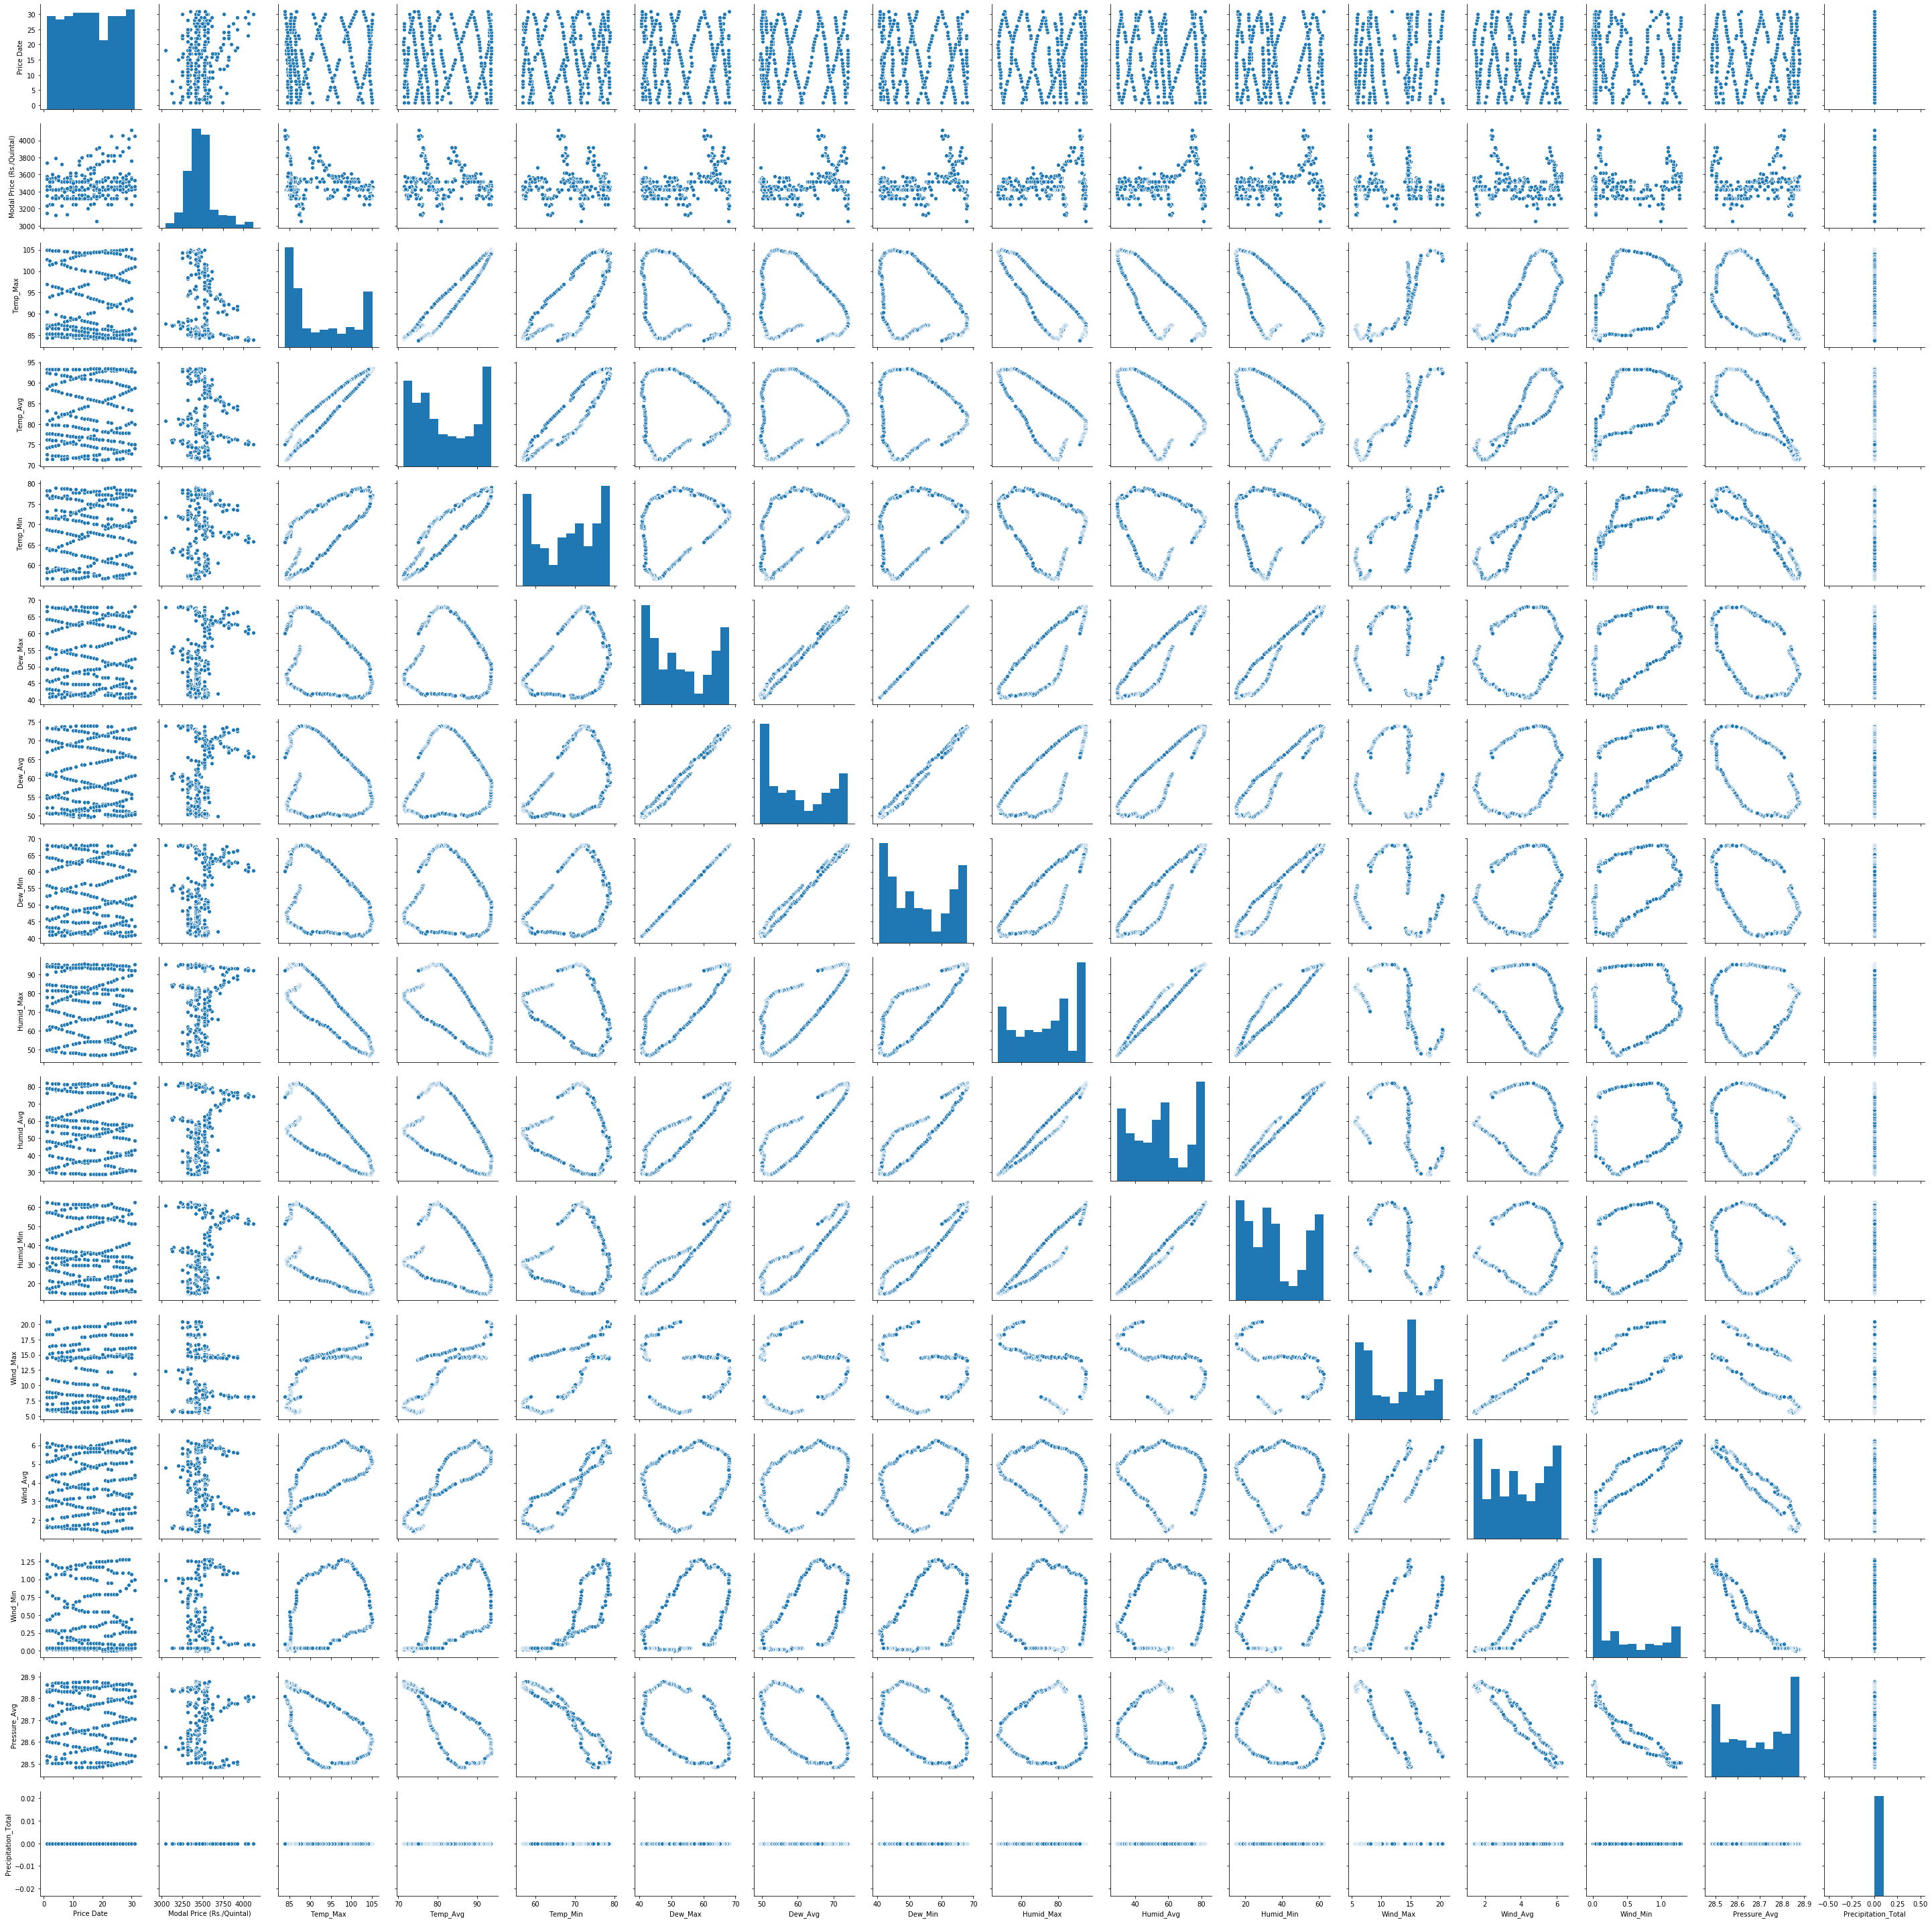

In [8]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [11]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 1000,max_depth=1000, random_state=20, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 15.8450345993042


In [12]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [13]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9638809865838106
0.7775468620493362


# Feature Importance

In [14]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.06435398587273303
Temp_Max -> 0.08787206644801814
Temp_Avg -> 0.043179303665138134
Temp_Min -> 0.03437919255805582
Dew_Max -> 0.06660814630135395
Dew_Avg -> 0.15069306547222555
Dew_Min -> 0.06615210478544135
Humid_Max -> 0.05419885965181529
Humid_Avg -> 0.09636818347353145
Humid_Min -> 0.1039077317258561
Wind_Max -> 0.06377470088626558
Wind_Avg -> 0.06126369216513365
Wind_Min -> 0.026941814681289762
Pressure_Avg -> 0.08030715231314231
Precipitation_Total -> 0.0


# predicted vs Actual

In [15]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

3575.111->3520
3398.015->3460
3326.757->3320
3252.39->3250
3428.104->3420
3814.417->3900
3460.08->3340
3400.149->3450
3513.526->3530
3451.845->3420
3503.426->3520
3536.434->3550
3529.555->3520
3223.82->3250
3345.05->3320
3525.182->3520
3312.305->3250
3406.765->3420
3399.929->3345
3515.665->3520
3426.284->3460
3184.355->3260
3912.374->3820
3705.826->3870
3276.095->3320
3445.725->3420
3399.315->3320
3314.83->3130
3353.69->3400
3520.229->3565
3324.756->3320
3357.96->3420
3501.75->3420
3526.31->3440
3409.231->3320
3401.474->3420
3421.482->3430
3512.052->3500
3426.311->3420
3386.058->3450
3398.825->3450
3692.392->3725
3552.255->3500
3697.669->3920
3467.844->3450
3358.444->3320
3599.28->3520
3572.672->3720
3521.985->3540
3324.82->3340
3396.462->3320
3876.349->3850
3521.066->3550
3515.419->3420
3527.319->3560
3441.362->3610
3766.046->3820
3455.485->3520
3527.755->3420
3419.378->3320
3461.992->3420
3516.776->3520
3575.387->3420
3432.794->3320
3559.059->3560
3453.126->3430
3404.115->3450
3506.2

In [16]:
print(sum_a/l)

54.842099999999995


# Create picke file

In [17]:
import pickle
filename = 'Nagpur_Soyabean'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [18]:
filename = 'Nagpur_Soyabean'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [19]:
print(sum/len(actual))

33.63751310861425
